In [5]:
import os
import shutil
import random
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance

In [6]:
def shuffle_and_enumerate_files(folder_path):
    # List all files in the folder
    files = [f.path for f in os.scandir(folder_path) if f.is_file()]

    # Randomly shuffle the files
    random.shuffle(files)

    # Enumerate and copy the shuffled files back to the folder
    for i, file_path in enumerate(files, start=1):
        _, file_extension = os.path.splitext(file_path)
        new_file_name = f"{i}{file_extension}"
        new_file_path = os.path.join(folder_path, new_file_name)
        shutil.move(file_path, new_file_path)


# Example usage:
output_folder = "./flowers/data"
shuffle_and_enumerate_files(output_folder)

In [7]:
def rename_images(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Sort the files based on their current names
    sorted_files = sorted(files, key=lambda x: int(x.split('.')[0]))

    # Rename the files with sequential numbers
    for i, file_name in enumerate(sorted_files):
        current_path = os.path.join(folder_path, file_name)
        new_name = f"{i + 1}.jpg"
        new_path = os.path.join(folder_path, new_name)
        os.rename(current_path, new_path)
        print(f"Renamed: {file_name} -> {new_name}")

# Specify the folder path containing the images
image_folder_path = "./flowers/data"

# Call the function to rename the images
rename_images(image_folder_path)

Renamed: 87.jpg -> 1.jpg
Renamed: 122.jpg -> 2.jpg
Renamed: 132.jpg -> 3.jpg
Renamed: 171.jpg -> 4.jpg
Renamed: 200.jpg -> 5.jpg
Renamed: 216.jpg -> 6.jpg
Renamed: 231.jpg -> 7.jpg
Renamed: 236.jpg -> 8.jpg
Renamed: 264.jpg -> 9.jpg
Renamed: 270.jpg -> 10.jpg
Renamed: 282.jpg -> 11.jpg
Renamed: 303.jpg -> 12.jpg
Renamed: 334.jpg -> 13.jpg
Renamed: 337.jpg -> 14.jpg
Renamed: 363.jpg -> 15.jpg
Renamed: 376.jpg -> 16.jpg
Renamed: 427.jpg -> 17.jpg
Renamed: 432.jpg -> 18.jpg
Renamed: 437.jpg -> 19.jpg
Renamed: 470.jpg -> 20.jpg
Renamed: 474.jpg -> 21.jpg
Renamed: 477.jpg -> 22.jpg
Renamed: 481.jpg -> 23.jpg
Renamed: 493.jpg -> 24.jpg
Renamed: 497.jpg -> 25.jpg
Renamed: 511.jpg -> 26.jpg
Renamed: 530.jpg -> 27.jpg
Renamed: 539.jpg -> 28.jpg
Renamed: 542.jpg -> 29.jpg
Renamed: 548.jpg -> 30.jpg
Renamed: 566.jpg -> 31.jpg
Renamed: 585.jpg -> 32.jpg
Renamed: 599.jpg -> 33.jpg
Renamed: 605.jpg -> 34.jpg
Renamed: 609.jpg -> 35.jpg
Renamed: 613.jpg -> 36.jpg
Renamed: 618.jpg -> 37.jpg
Renamed: 62

In [16]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return image

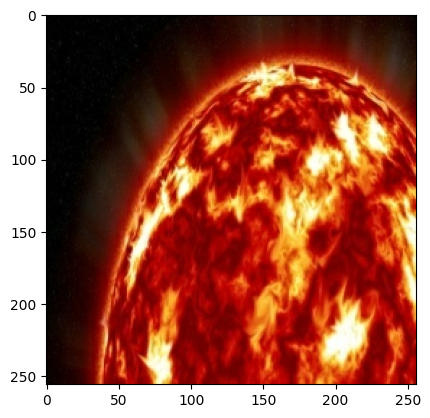

In [27]:
data_folder = "./space/data/img_align_celeba" # "./flowers/data"


# Number of images to preprocess
num_images = 1

for i in range(1, num_images + 1):
    # File path for the original image
    file_path = os.path.join(data_folder, f"{i}.jpg")

    re = load(file_path)
    plt.figure()
    plt.imshow(re)
    # Save the preprocessed image
    #output_path = os.path.join(output_folder, f"{i}_preprocessed.jpg")
    #cv2.imwrite(output_path, cv2.cvtColor(preprocessed_img, cv2.COLOR_RGB2BGR))

In [18]:
def resize_images(folder_path, target_size=(256, 256)):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file in the folder
    for file_name in files:
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)

        # Read the image
        img = cv2.imread(file_path)

        # Resize the image to the target size without maintaining aspect ratio
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

        # Save the resized image
        cv2.imwrite(file_path, img_resized)


# Specify the target size for resizing
target_size = (256, 256)

# Call the function to resize the images
resize_images(data_folder, target_size)

In [19]:
def concatenate_images(original_path, preprocessed_path, output_folder):
    # Read the original and preprocessed images
    original_img = cv2.imread(original_path)
    preprocessed_img = cv2.imread(preprocessed_path)

    # Resize the preprocessed image to match the height of the original image
    preprocessed_img = cv2.resize(preprocessed_img, (original_img.shape[1], original_img.shape[0]))

    # Concatenate the images horizontally
    combined_img = np.concatenate((original_img, preprocessed_img), axis=1)

    # Save the combined image
    output_path = os.path.join(output_folder, f"{os.path.basename(original_path)}_combined.jpg")
    cv2.imwrite(output_path, combined_img)

In [22]:
def preprocess_image(file_path, target_size=(256, 256)):
    # Load original image
    og = tf.io.read_file(file_path)
    og = tf.image.decode_jpeg(og, channels=3)  
     # Scale image to a random size between 100% and 130% of the desired image size
    scale_factor = tf.random.uniform([], 1.0, 1.3)
    scaled_height = tf.cast(tf.round(tf.multiply(tf.cast(target_size[0], tf.float32), scale_factor)), tf.int32)
    scaled_width = tf.cast(tf.round(tf.multiply(tf.cast(target_size[1], tf.float32), scale_factor)), tf.int32)

    img = tf.image.resize(og, size=[scaled_height, scaled_width], method=tf.image.ResizeMethod.BILINEAR)

    # # Take random crop of the desired size
    img = tf.image.random_crop(img, size=[target_size[0], target_size[1], 3])


    # # Convert to grayscale
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.grayscale_to_rgb(img)

    # # Downscale 24x with area filtering, upscale back to original size with cubic filtering
    img = tf.image.resize(img, size=[target_size[0] // 24, target_size[1] // 24], method=tf.image.ResizeMethod.AREA)
    img = tf.image.resize(img, size=[target_size[0], target_size[1]], method=tf.image.ResizeMethod.BICUBIC)

    # # Apply random brightness of up to ±20%
    img = tf.image.random_brightness(img, max_delta=0.2)

    # # Apply random contrast of up to ±15%
    img = tf.image.random_contrast(img, lower=0.85, upper=1.15)
    combined_img = np.concatenate((og, img), axis=1)
    #plt.figure()
    #plt.imshow(combined_img/255)   
    return combined_img


In [30]:
num_images = 3612

for i in range(3612, 3613):
    # File path for the original image
    file_path = os.path.join(data_folder, f"{i}.jpg")
    output_folder = "./space/data/combined_images"
    file_outpath =  os.path.join(output_folder, f"{i}.jpg")
    os.makedirs(output_folder, exist_ok=True)
    # Preprocess the image
    preprocessed_img = preprocess_image(file_path)
    preprocessed_img = cv2.cvtColor(preprocessed_img, cv2.COLOR_BGRA2RGBA)

    cv2.imwrite(file_outpath, preprocessed_img)
    # Save the preprocessed image
    

In [8]:
import os
import random
import shutil

# Set the path to your dataset
dataset_path = "./space/combined_images"

# Set the paths for the train, val, and test sets
train_path = "./space/train"
val_path = "./space/val"
test_path = "./space/test"

# Ensure the directories exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# List all image files in the dataset directory
all_images = os.listdir(dataset_path)
random.shuffle(all_images)  # Shuffle the list for random splitting

# Calculate the number of images for each split
total_images = len(all_images)
train_split = int(0.8 * total_images)
val_split = int(0.1 * total_images)

# Split the dataset
train_images = all_images[:train_split]
val_images = all_images[train_split:train_split + val_split]
test_images = all_images[train_split + val_split:]

# Move the images to their respective directories
for img in train_images:
    shutil.move(os.path.join(dataset_path, img), os.path.join(train_path, img))

for img in val_images:
    shutil.move(os.path.join(dataset_path, img), os.path.join(val_path, img))

for img in test_images:
    shutil.move(os.path.join(dataset_path, img), os.path.join(test_path, img))




In [9]:
rename_images(train_path)
rename_images(val_path)
rename_images(test_path)

Renamed: 1.jpg -> 1.jpg
Renamed: 3.jpg -> 2.jpg
Renamed: 4.jpg -> 3.jpg
Renamed: 5.jpg -> 4.jpg
Renamed: 6.jpg -> 5.jpg
Renamed: 7.jpg -> 6.jpg
Renamed: 8.jpg -> 7.jpg
Renamed: 9.jpg -> 8.jpg
Renamed: 10.jpg -> 9.jpg
Renamed: 11.jpg -> 10.jpg
Renamed: 13.jpg -> 11.jpg
Renamed: 14.jpg -> 12.jpg
Renamed: 15.jpg -> 13.jpg
Renamed: 16.jpg -> 14.jpg
Renamed: 17.jpg -> 15.jpg
Renamed: 18.jpg -> 16.jpg
Renamed: 19.jpg -> 17.jpg
Renamed: 20.jpg -> 18.jpg
Renamed: 21.jpg -> 19.jpg
Renamed: 22.jpg -> 20.jpg
Renamed: 23.jpg -> 21.jpg
Renamed: 24.jpg -> 22.jpg
Renamed: 27.jpg -> 23.jpg
Renamed: 28.jpg -> 24.jpg
Renamed: 29.jpg -> 25.jpg
Renamed: 30.jpg -> 26.jpg
Renamed: 31.jpg -> 27.jpg
Renamed: 32.jpg -> 28.jpg
Renamed: 33.jpg -> 29.jpg
Renamed: 34.jpg -> 30.jpg
Renamed: 35.jpg -> 31.jpg
Renamed: 36.jpg -> 32.jpg
Renamed: 37.jpg -> 33.jpg
Renamed: 38.jpg -> 34.jpg
Renamed: 39.jpg -> 35.jpg
Renamed: 40.jpg -> 36.jpg
Renamed: 43.jpg -> 37.jpg
Renamed: 44.jpg -> 38.jpg
Renamed: 45.jpg -> 39.jpg
Ren